In this notebook, we plot (steady-state, tau) vs. H under different systems with different sorts of dynamics. We have 5 systems to consider:
- Actual system: nonlinear degradation: $\dot{x} = (H-\frac{P_{tot}(k+\delta)x}{K+x}-\delta x) / \text{[a down-scaling term that varies with x but is generally close to 1]}$
- Actual system without retroactivity: same steady state, no 'sponge' effect from protein-protease complex
- Dilution only: No removal by protease
- No saturation (protein always proportionately removed, at rate $x\frac{kP_{tot}}{K}$; Maximum ratio removal;
- Full saturation; protein always removed at rate $kP_{tot}$; Maximum absolute-rate removal; Will have negative steady state for $H<kP_{tot}$

In [2]:
import sys
import os
sys.path.append(os.path.expanduser('~/Dropbox/iGEM 2017/math_workspace/'))
%pylab inline
import numpy as np
import pandas as pd
import itertools
import taufinder
import seaborn as sns
from matplotlib import pyplot as plt
import ggplot
from literature_parameters import literature_parameter_set
from copy import deepcopy
from ode_functions import get_ode

system_types= [
           'actual',
           'no_retro',
           'dilution_only',
           'no_saturation',
        #'full_saturation',
]

LITERATURE_PARAMETER_SET = literature_parameter_set(1)
H_lit = LITERATURE_PARAMETER_SET['H']
K_lit = LITERATURE_PARAMETER_SET['K']
def vary_H(system_type, H_range):
    paramset = deepcopy(LITERATURE_PARAMETER_SET)
    taus = [None]*len(H_range)
    half_sss = [None]*len(H_range)
    for i in range(len(H_range)):
        odefun = get_ode(system_type, paramset)
        paramset['H'] = H_range[i]
        tau, err     = taufinder.find_tau(odefun, np.array([0]))
        half_ss      = taufinder.find_half_ss(odefun, np.array([0]))
        
        taus[i]      = tau
        half_sss[i]  = half_ss
    return pd.DataFrame({'H': H_range, 'tau': taus, 'half_ss': half_sss})

def vary_K(system_type, K_range):
    paramset = deepcopy(LITERATURE_PARAMETER_SET)
    taus = [None]*len(K_range)
    half_sss = [None]*len(K_range)
    for i in range(len(K_range)):
        odefun = get_ode(system_type, paramset)
        paramset['K'] = K_range[i]
        tau, err     = taufinder.find_tau(odefun, np.array([0]))
        half_ss      = taufinder.find_half_ss(odefun, np.array([0]))
        
        taus[i]      = tau
        half_sss[i]  = half_ss
    return pd.DataFrame({'K': K_range, 'tau': taus, 'half_ss': half_sss})

df_list_H = []
for system_type in system_types:
    df_tmp = vary_H(system_type=system_type, H_range = H_lit * np.logspace(start=-1 , stop = 1, num = 100))
    df_tmp['system_type'] = system_type
    df_list_H.append(df_tmp)
df_master_H = pd.concat(df_list_H)
'''
df_list_K = []
for system_type in ode_dict.keys():
    df_tmp = vary_K(system_type=system_type, K_range = np.logspace(start = K_lit *.01 , stop = K_lit * 10, num = 100))
    df_tmp['system_type'] = system_type
    df_list_K.append(df_tmp
df_master_K = pd.concat(df_list_K)
'''
df_master_H['tsratio']=df_master_H.tau/df_master_H.half_ss


Populating the interactive namespace from numpy and matplotlib
Performed 26 bisections to find tau
Performed 27 bisections to find tau
Performed 25 bisections to find tau
Performed 26 bisections to find tau
Performed 26 bisections to find tau
Performed 27 bisections to find tau
Performed 26 bisections to find tau
Performed 22 bisections to find tau
Performed 25 bisections to find tau
Performed 26 bisections to find tau
Performed 23 bisections to find tau
Performed 27 bisections to find tau
Performed 25 bisections to find tau
Performed 27 bisections to find tau
Performed 24 bisections to find tau
Performed 25 bisections to find tau
Performed 25 bisections to find tau
Performed 26 bisections to find tau
Performed 22 bisections to find tau
Performed 23 bisections to find tau
Performed 25 bisections to find tau
Performed 26 bisections to find tau
Performed 26 bisections to find tau
Performed 26 bisections to find tau
Performed 26 bisections to find tau
Performed 26 bisections to find tau
P

In [3]:
fltr = df_master_H.system_type.isin(['actual', 'no_saturation'])

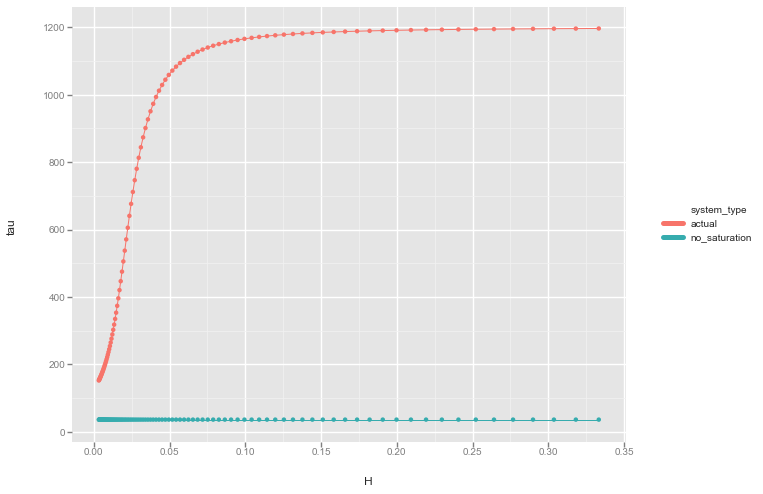

<ggplot: (283743117)>

In [4]:
from ggplot import *
ggplot(aes(x='H', y='tau', color = 'system_type'), data = df_master_H[fltr]) + geom_line() +geom_point() #+ scale_x_log()

In [ ]:
from ggplot import *
ggplot(aes(x='H', y='half_ss', color = 'system_type'), data = df_master_H[fltr]) + geom_line() +geom_point() #+ scale_x_log()